In [2]:
from pylab import *
from scipy.integrate import *

In [64]:
def pendulo(t,th_vth,omega2=1):
    return array([th_vth[1],-omega2*sin(th_vth[0])])

def E_pendulo(th_vth,omega2=1):
    return 0.5*(th_vth[1]**2) + omega2*(1-cos(th_vth[0]))

In [69]:
intervalo = (0,100*pi)
ci = [2,0]
Ei = E_pendulo(ci)
print('Energía inicial:',Ei)
th_vth = solve_ivp(pendulo,intervalo,ci,atol=1e-8,rtol=1e-8,dense_output=True)
Ef = E_pendulo([th_vth.y[0][-1],th_vth.y[1][-1]])
print('Energía final:',Ef,'\t Num. puntos de integración: ' ,len(th_vth.t) )
err_E = abs(Ef-Ei)/Ei
err_E_p = 100*abs(Ef-Ei)/Ei
print('Error en la Energía: ', err_E)
print('Error porcentual de la Energía: ',err_E_p)

Energía inicial: 1.4161468365471424
Energía final: 1.416145479022151 	 Num. puntos de integración:  2425
Error en la Energía:  9.586046843968087e-07
Error porcentual de la Energía:  9.586046843968088e-05


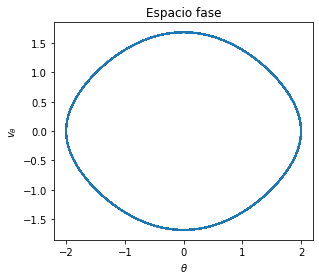

In [62]:
t = linspace(intervalo[0],intervalo[-1],15000)
esp_fase = th_vth.sol(t)
title(r'Espacio fase')
plot(esp_fase[0],esp_fase[1])
xlabel(r'$\theta$'),ylabel(r'$v_{\theta}$')
gca().set_aspect('equal')
show()

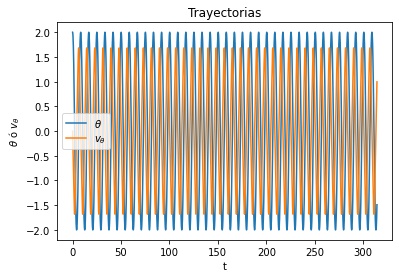

In [63]:
title(r'Trayectorias')
plot(t,esp_fase[0],label=r'$\theta$')
plot(t,esp_fase[1],label=r'$v_{\theta}$')
xlabel(r't'),ylabel(r'$\theta$ ó $v_{\theta}$')
legend()
#gca().set_aspect('equal')
show()

In [93]:
intervalo = (0,10*pi)
N_tray , N_puntos = 15 , 500
t = linspace(intervalo[0],intervalo[1],N_puntos)
th_0s = linspace(0.1,pi-0.1,N_tray)
trayectorias = zeros((2,N_puntos,N_tray))
for i in range(N_tray):
    ci = [th_0s[i],0]
    Ei = E_pendulo(ci)
    th_vth = solve_ivp(pendulo,intervalo,ci,atol=1e-8,rtol=1e-8,dense_output=True)
    Ef = E_pendulo([th_vth.y[0][-1],th_vth.y[1][-1]])
    err_E = abs(Ef-Ei)/Ei
    trayectorias[:,:,i] = th_vth.sol(t)

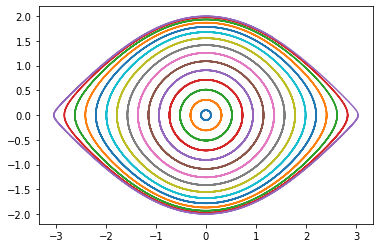

In [94]:
for i in range(N_tray):
    plot(trayectorias[0,:,i],trayectorias[1,:,i])
show()